In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
crm_data = pd.read_csv('/content/drive/MyDrive/CRM_DATA_KRISHNA/Ecom_CRM_analysis.csv', encoding='ISO-8859-1')

In [4]:
crm_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
crm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df_cancellations = crm_data[['InvoiceNo', 'InvoiceDate']]
df_cancellations['Cancelled'] = df_cancellations['InvoiceNo'].str.contains('C')
df_cancellations['InvoiceDate'] = pd.to_datetime(df_cancellations['InvoiceDate'])
df_cancellations.set_index('InvoiceDate', inplace=True)
df_cancellations = df_cancellations[df_cancellations['Cancelled']==True]
df_cancellations.info()


<ipython-input-6-e3642cf0ec26>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cancellations['Cancelled'] = df_cancellations['InvoiceNo'].str.contains('C')


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9288 entries, 2010-12-01 09:41:00 to 2011-12-09 11:58:00
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   InvoiceNo  9288 non-null   object
 1   Cancelled  9288 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 154.2+ KB


<ipython-input-6-e3642cf0ec26>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cancellations['InvoiceDate'] = pd.to_datetime(df_cancellations['InvoiceDate'])


In [7]:
crm_data.isnull().sum().sort_values(ascending=False)

,0
CustomerID,135080
Description,1454
InvoiceNo,0
StockCode,0
Quantity,0
InvoiceDate,0
UnitPrice,0
Country,0


Above command shows there are 541909 records in the dataset.   
Description and CustomerID are the columns that have missing data.

In [8]:
# check out the rows with missing values
crm_data[crm_data.isnull().any(axis=1)].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [9]:
crm_data[crm_data['StockCode']== '22139']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
106,536381,22139,RETROSPOT TEA SET CERAMIC 11 PC,23,12/1/2010 9:41,4.25,15311.0,United Kingdom
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
6392,536942,22139,amazon,15,12/3/2010 12:08,0.00,NaN,United Kingdom
6885,536982,22139,RETROSPOT TEA SET CERAMIC 11 PC,10,12/3/2010 14:27,11.02,NaN,United Kingdom
7203,537011,22139,NaN,-5,12/3/2010 15:38,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
538411,581405,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,12/8/2011 13:50,4.95,13521.0,United Kingdom
539531,581439,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,12/8/2011 16:30,10.79,NaN,United Kingdom
540441,581486,22139,RETROSPOT TEA SET CERAMIC 11 PC,6,12/9/2011 9:38,4.95,17001.0,United Kingdom
541387,581498,22139,RETROSPOT TEA SET CERAMIC 11 PC,2,12/9/2011 10:26,10.79,NaN,United Kingdom


## Fill Missing Values

In [10]:
# Fill in the missing values of Description based on Stock code

crm_data['Description'] = crm_data.groupby('StockCode')['Description'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

In [11]:
# Fill in the missing values of CustomerID based on Invoice No

crm_data['CustomerID'] = crm_data.groupby('InvoiceNo')['CustomerID'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.NaN))

In [12]:
crm_data[crm_data['Description']=='Unknown']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1970,536545,21134,Unknown,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1987,536549,85226A,Unknown,1,12/1/2010 14:34,0.0,NaN,United Kingdom
1988,536550,85044,Unknown,1,12/1/2010 14:34,0.0,NaN,United Kingdom
2024,536552,20950,Unknown,1,12/1/2010 14:34,0.0,NaN,United Kingdom
2026,536554,84670,Unknown,23,12/1/2010 14:35,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
280754,561498,21610,Unknown,-14,7/27/2011 14:10,0.0,NaN,United Kingdom
281615,561555,37477B,Unknown,-11,7/28/2011 10:21,0.0,NaN,United Kingdom
281616,561557,37477C,Unknown,-31,7/28/2011 10:21,0.0,NaN,United Kingdom
346849,567207,35592T,Unknown,4,9/19/2011 11:01,0.0,NaN,United Kingdom


In [13]:
crm_data.isnull().sum().sort_values(ascending=False)

,0
CustomerID,135080
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
Country,0


In [14]:
crm_data['CustomerID'] = crm_data.groupby(by=['InvoiceDate','Country'])['CustomerID'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else np.NaN))

In [15]:
crm_data.isnull().sum().sort_values(ascending=False)

,0
CustomerID,126575
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
Country,0


In [16]:
crm_data = crm_data.dropna()

In [17]:
crm_data.describe()

,Quantity,UnitPrice,CustomerID
count,415334.000000,415334.000000,415334.000000
mean,11.845917,3.680269,15292.029485
std,246.299650,77.570323,1713.013510
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,5.000000,1.950000,15154.000000
75%,12.000000,3.750000,16800.000000
max,80995.000000,38970.000000,18287.000000


In [18]:
crm_data.isnull().sum().sort_values(ascending=False)

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


### Find Duplicates

In [19]:
# Find Duplicates
duplicate = crm_data[crm_data.duplicated()]

In [20]:
duplicate

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/2011 11:34,2.10,14446.0,United Kingdom


In [21]:
crm_data[(crm_data['StockCode']== '21866') & (crm_data['InvoiceNo']== '536409') ]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom


In [22]:
# Remove Duplicate based on all columns and keep first occurence
crm_data = crm_data.drop_duplicates(keep='first')

In [23]:
duplicate = crm_data[crm_data.duplicated()]
duplicate

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [24]:
crm_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 410109 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    410109 non-null  object 
 1   StockCode    410109 non-null  object 
 2   Description  410109 non-null  object 
 3   Quantity     410109 non-null  int64  
 4   InvoiceDate  410109 non-null  object 
 5   UnitPrice    410109 non-null  float64
 6   CustomerID   410109 non-null  float64
 7   Country      410109 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 28.2+ MB


#### Change Data type of columns

In [25]:
# change the InvoiceDate format - String to Timestamp format
crm_data['InvoiceDate'] = pd.to_datetime(crm_data.InvoiceDate, format='%m/%d/%Y %H:%M')

In [26]:
# change columns type - String to Int type
crm_data['CustomerID'] = crm_data['CustomerID'].astype('int64')

In [27]:
crm_data.describe().round(2)

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,410109.00,410109,410109.00,410109.00
mean,11.96,2011-07-10 14:07:19.377043712,3.70,15285.69
min,-80995.00,2010-12-01 08:26:00,0.00,12346.00
25%,2.00,2011-04-07 11:12:00,1.25,13940.00
50%,5.00,2011-07-29 15:02:00,1.95,15150.00
75%,12.00,2011-10-20 12:41:00,3.75,16794.00
max,80995.00,2011-12-09 12:50:00,38970.00,18287.00
std,247.84,NaN,78.06,1713.42


**Remove Outliers**

In [28]:
crm_data.drop(crm_data[crm_data.Quantity < -10000].index, inplace=True)
crm_data.drop(crm_data[crm_data.Quantity > 15000].index, inplace=True)

In [29]:
crm_data['CustomerID'].nunique()

4371

No of Unique Customers in data set is 4371

In [30]:
crm_data['InvoiceDate'].min()

Timestamp('2010-12-01 08:26:00')

In [31]:
crm_data['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [32]:
crm_data['InvoiceNo'].nunique()

22547

No of Unique Invoices in data set is 22547

In [33]:
crm_data['StockCode'].nunique()

3780

In [34]:
crm_data['Description'].nunique()

3953

In [35]:
crm_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 410105 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    410105 non-null  object        
 1   StockCode    410105 non-null  object        
 2   Description  410105 non-null  object        
 3   Quantity     410105 non-null  int64         
 4   InvoiceDate  410105 non-null  datetime64[ns]
 5   UnitPrice    410105 non-null  float64       
 6   CustomerID   410105 non-null  int64         
 7   Country      410105 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 28.2+ MB


In [36]:
crm_data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,410105.000000,410105,410105.000000,410105.000000
mean,11.962729,2011-07-10 14:07:28.379025152,3.696400,15285.699106
min,-9360.000000,2010-12-01 08:26:00,0.000000,12347.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13940.000000
50%,5.000000,2011-07-29 15:02:00,1.950000,15150.000000
75%,12.000000,2011-10-20 12:41:00,3.750000,16794.000000
max,12540.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,50.716759,NaN,78.062737,1713.414264


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='Quantity'>

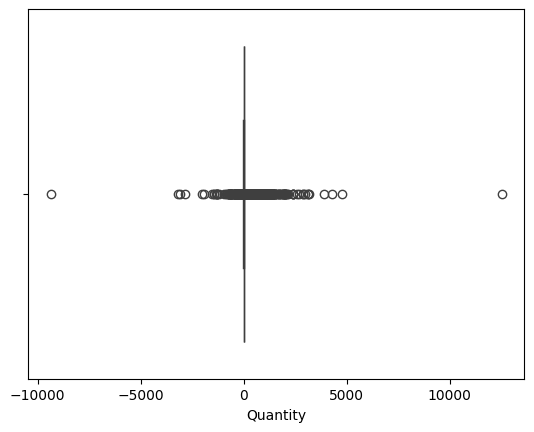

In [37]:
sns.boxplot(x="Quantity",data=crm_data)

In [38]:
crm_data[crm_data['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


As we see we have 9045 transactions that are marked as returned.

In [39]:
crm_data[crm_data['UnitPrice'] == 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1987,536549,85226A,Unknown,1,2010-12-01 14:34:00,0.0,17346,United Kingdom
1988,536550,85044,Unknown,1,2010-12-01 14:34:00,0.0,17346,United Kingdom
2024,536552,20950,Unknown,1,2010-12-01 14:34:00,0.0,17346,United Kingdom
4347,536764,84952C,MIRROR LOVE BIRD T-LIGHT HOLDER,-38,2010-12-02 14:42:00,0.0,17685,United Kingdom
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647,Germany
...,...,...,...,...,...,...,...,...
514981,579755,84912B,damaged,-14,2011-11-30 14:54:00,0.0,14733,United Kingdom
529667,580743,47591B,SCOTTIES CHILDRENS APRON,1,2011-12-06 09:30:00,0.0,13694,United Kingdom
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,17677,United Kingdom
536981,581234,72817,SET OF 2 CHRISTMAS DECOUPAGE CANDLE,27,2011-12-08 10:33:00,0.0,13436,United Kingdom


In [40]:
free_df = crm_data[crm_data['UnitPrice'] == 0]

free_df['StockCode'].nunique()

242

We can see from Dataset that we have 242 unique products with unit Price as 0.

**Add New Columns**

In [41]:
crm_data['AmountSpent'] = crm_data['Quantity'] * crm_data['UnitPrice']
crm_data['Month'] = crm_data.InvoiceDate.dt.month
crm_data['Day']  = crm_data.InvoiceDate.dt.dayofweek+1
crm_data['Hour'] = crm_data.InvoiceDate.dt.hour
crm_data['Year'] = crm_data.InvoiceDate.dt.year
crm_data['YearMonth'] = crm_data['InvoiceDate'].map(lambda x: 100*x.year + x.month)

In [42]:
crm_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,Month,Day,Hour,Year,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12,3,8,2010,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,3,8,2010,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,12,3,8,2010,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,3,8,2010,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,3,8,2010,201012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,12,5,12,2011,201112
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,12,5,12,2011,201112
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,12,5,12,2011,201112
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,12,5,12,2011,201112


**Exploratory Data Analysis**

In [43]:
crm_data.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()

,CustomerID,Country,InvoiceNo
0,12347,Iceland,182
1,12348,Finland,31
2,12349,Italy,73
3,12350,Norway,17
4,12352,Norway,95
...,...,...,...
4374,18280,United Kingdom,10
4375,18281,United Kingdom,7
4376,18282,United Kingdom,13
4377,18283,United Kingdom,721


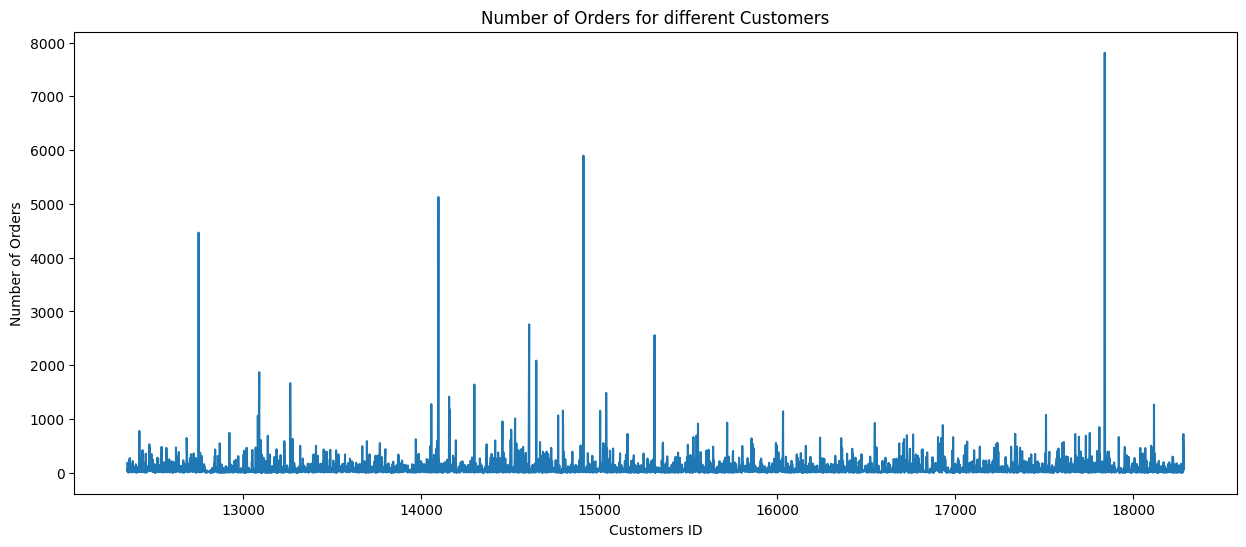

In [44]:
orders = crm_data.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID, orders.InvoiceNo)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

In [45]:
print('The TOP 5 customers with most number of orders...')
orders.sort_values(by='InvoiceNo', ascending=False).head()

The TOP 5 customers with most number of orders...


,CustomerID,Country,InvoiceNo
4049,17841,United Kingdom,7812
1902,14911,EIRE,5898
1307,14096,United Kingdom,5128
337,12748,United Kingdom,4466
1681,14606,United Kingdom,2761


**Check TOP 5 highest money spent**

In [46]:
customer_spent = crm_data.groupby(by=['CustomerID','Country'], as_index=False)['AmountSpent'].sum()

In [47]:
# customer_spent.sort_values(by='AmountSpent', ascending=False).head()
customer_spent_top5 = customer_spent.sort_values(by='AmountSpent', ascending=False).head()
customer_spent_top5

,CustomerID,Country,AmountSpent
1710,14646,Netherlands,279489.02
4240,18102,United Kingdom,260242.45
3765,17450,United Kingdom,187322.17
1902,14911,EIRE,132458.73
56,12415,Australia,123725.45


<Axes: ylabel='Country'>

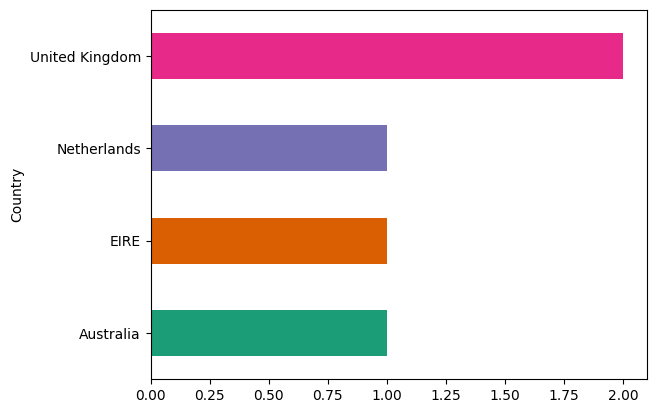

In [48]:
customer_spent_top5.groupby('Country').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))


In [49]:
crm_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 410105 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    410105 non-null  object        
 1   StockCode    410105 non-null  object        
 2   Description  410105 non-null  object        
 3   Quantity     410105 non-null  int64         
 4   InvoiceDate  410105 non-null  datetime64[ns]
 5   UnitPrice    410105 non-null  float64       
 6   CustomerID   410105 non-null  int64         
 7   Country      410105 non-null  object        
 8   AmountSpent  410105 non-null  float64       
 9   Month        410105 non-null  int32         
 10  Day          410105 non-null  int32         
 11  Hour         410105 non-null  int32         
 12  Year         410105 non-null  int32         
 13  YearMonth    410105 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(4), int64(3), object(4)
memory usage: 40.7+ MB


No of Orders from Year and Month wise

In [50]:
crm_data.groupby('InvoiceNo')['YearMonth'].unique().value_counts().sort_index()

,count
YearMonth,
[201012],1739
[201101],1257
[201102],1211
[201103],1647
[201104],1414
[201105],1890
[201106],1737
[201107],1627
[201108],1563


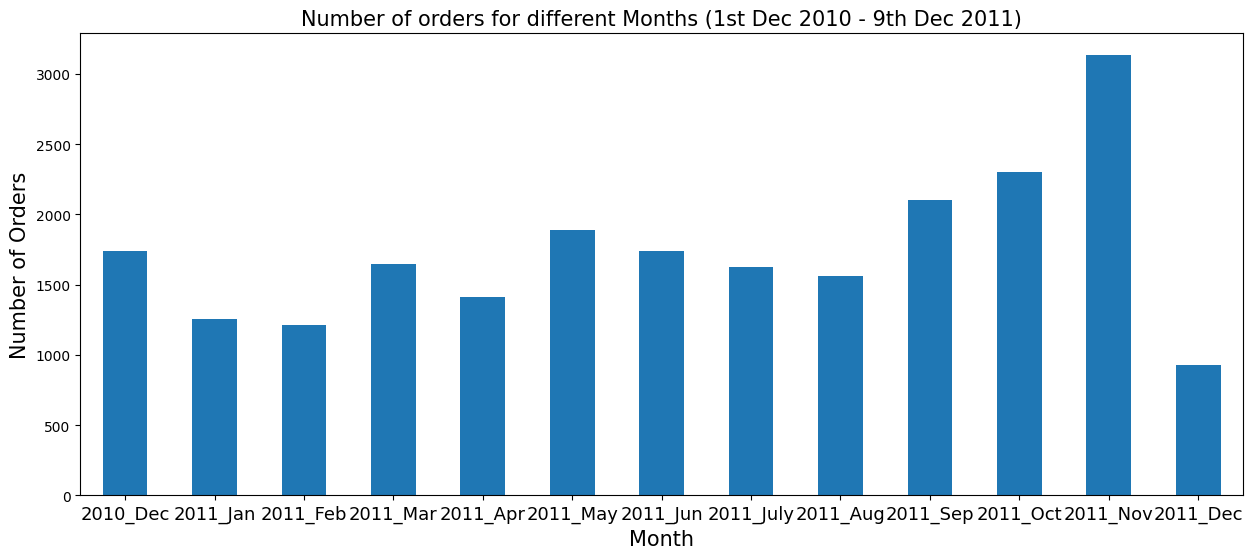

In [51]:
color = sns.color_palette()
ax = crm_data.groupby('InvoiceNo')['YearMonth'].unique().value_counts().sort_index().plot(kind='bar',color=color[0],figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('2010_Dec','2011_Jan','2011_Feb','2011_Mar','2011_Apr','2011_May','2011_Jun','2011_July','2011_Aug','2011_Sep','2011_Oct','2011_Nov','2011_Dec'), rotation='horizontal', fontsize=13)
plt.show()

**No of Orders from Day Wise**

In [52]:
crm_data.groupby('InvoiceNo')['Day'].unique().value_counts().sort_index()

,count
Day,
[1],3572
[2],3976
[3],4171
[4],5052
[5],3431
[7],2345


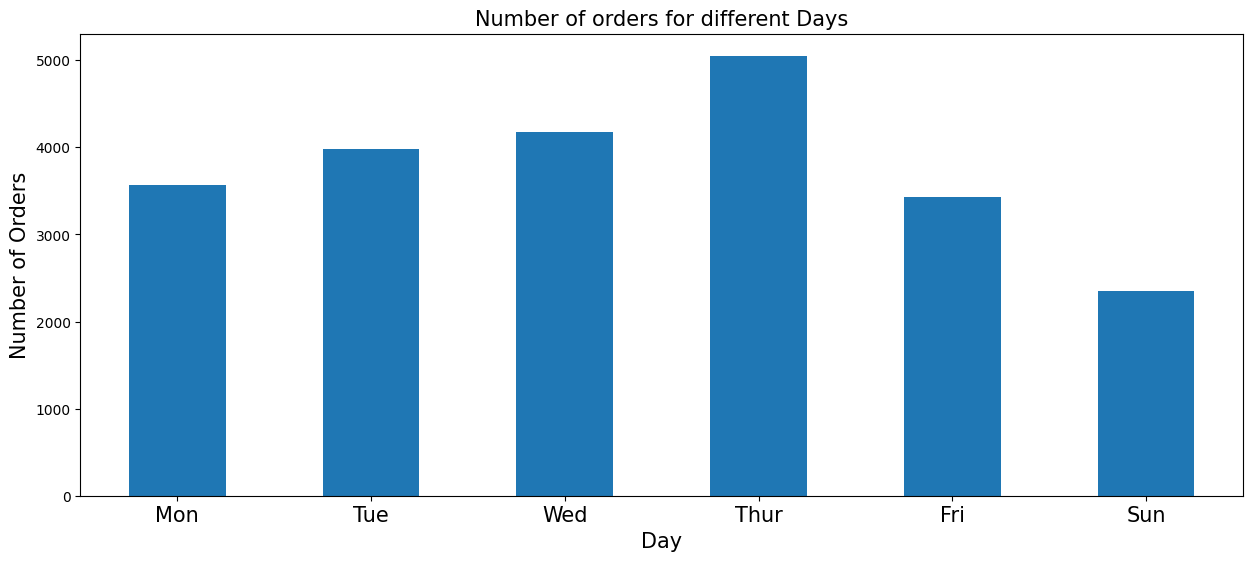

In [53]:
color = sns.color_palette()
ax = crm_data.groupby('InvoiceNo')['Day'].unique().value_counts().sort_index().plot(kind='bar',color=color[0],figsize=(15,6))
ax.set_xlabel('Day',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Days',fontsize=15)
ax.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sun'), rotation='horizontal', fontsize=15)
plt.show()

In [54]:
free_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1987,536549,85226A,Unknown,1,2010-12-01 14:34:00,0.0,17346,United Kingdom
1988,536550,85044,Unknown,1,2010-12-01 14:34:00,0.0,17346,United Kingdom
2024,536552,20950,Unknown,1,2010-12-01 14:34:00,0.0,17346,United Kingdom
4347,536764,84952C,MIRROR LOVE BIRD T-LIGHT HOLDER,-38,2010-12-02 14:42:00,0.0,17685,United Kingdom
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647,Germany
...,...,...,...,...,...,...,...,...
514981,579755,84912B,damaged,-14,2011-11-30 14:54:00,0.0,14733,United Kingdom
529667,580743,47591B,SCOTTIES CHILDRENS APRON,1,2011-12-06 09:30:00,0.0,13694,United Kingdom
536908,581226,23090,missing,-338,2011-12-08 09:56:00,0.0,17677,United Kingdom
536981,581234,72817,SET OF 2 CHRISTMAS DECOUPAGE CANDLE,27,2011-12-08 10:33:00,0.0,13436,United Kingdom


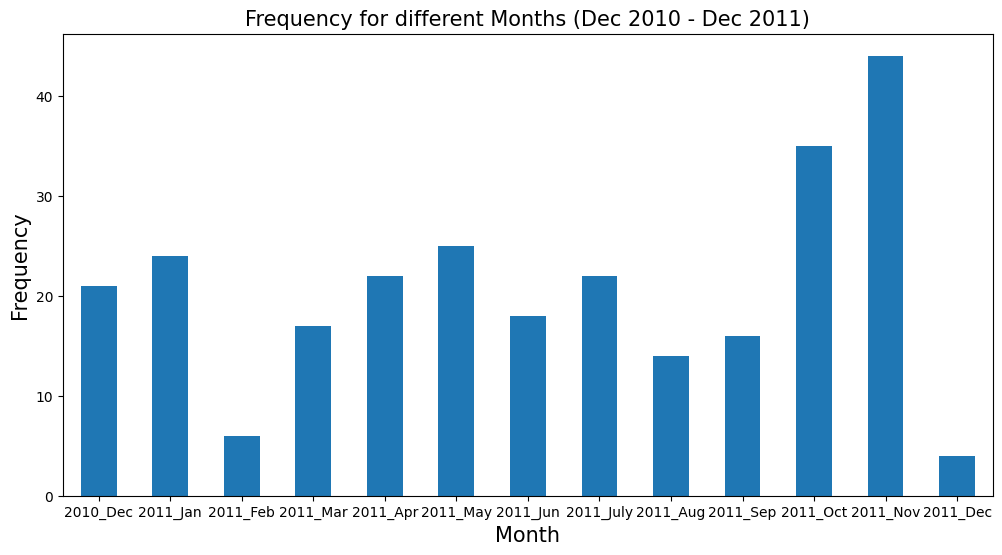

In [55]:
free_df = crm_data[crm_data['UnitPrice'] == 0]
ax = free_df.YearMonth.value_counts().sort_index().plot(kind='bar',figsize=(12,6), color=color[0])
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ax.set_title('Frequency for different Months (Dec 2010 - Dec 2011)',fontsize=15)
ax.set_xticklabels(('2010_Dec','2011_Jan','2011_Feb','2011_Mar','2011_Apr','2011_May','2011_Jun','2011_July','2011_Aug','2011_Sep','2011_Oct','2011_Nov','2011_Dec'), rotation='horizontal', fontsize=10)
plt.show()

In [56]:
free_df['StockCode'].nunique()

242

In [57]:
country_orders = crm_data.groupby('Country')['InvoiceNo'].count().sort_values()

In [58]:
country_orders

,InvoiceNo
Country,
Saudi Arabia,10
Bahrain,17
Czech Republic,30
Brazil,32
Lithuania,35
Lebanon,45
RSA,58
European Community,61
United Arab Emirates,68


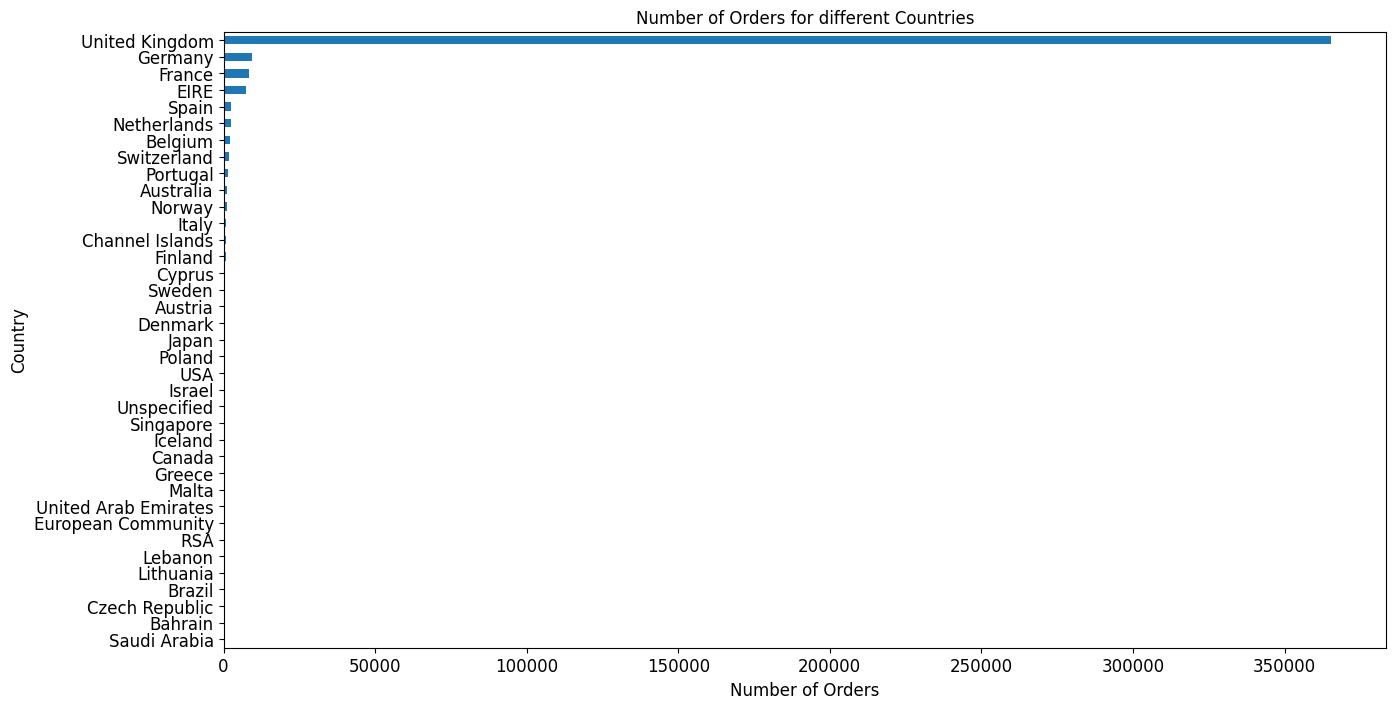

In [59]:
plt.subplots(figsize=(15,8))
country_orders.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

<Axes: title={'center': 'Frequency of order by Week'}, xlabel='Week'>

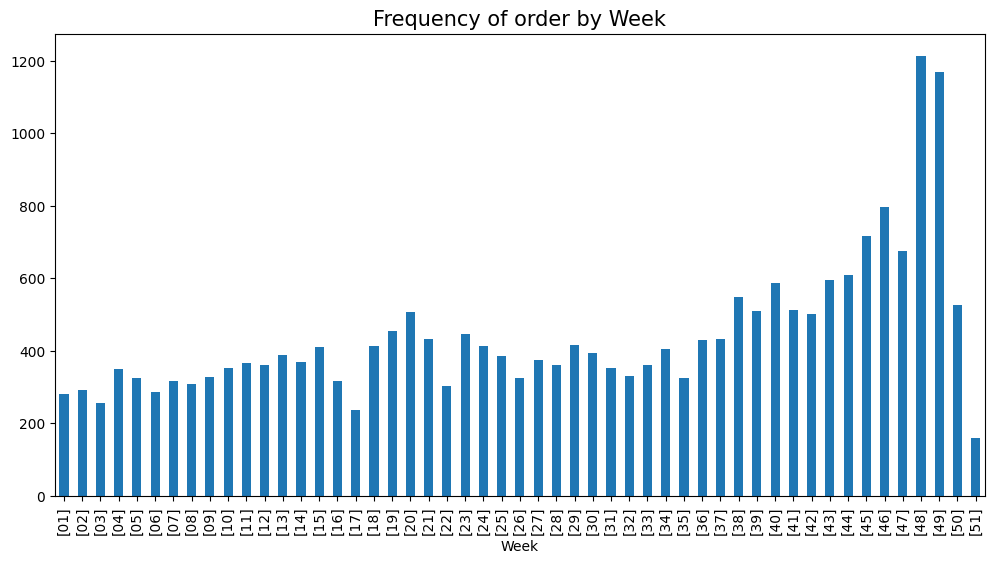

In [60]:
crm_data['Week'] = crm_data['InvoiceDate'].apply(lambda x: x.strftime('%W'))
plt.figure(figsize=(12,6))
plt.title("Frequency of order by Week", fontsize=15)
InvoiceDateVal = crm_data.groupby(['InvoiceNo'])['Week'].unique()
InvoiceDateVal.value_counts().sort_index().plot.bar()

In [61]:
mean_price_by_country = crm_data.groupby('Country')['AmountSpent'].mean()
mean_quantity_by_country = crm_data.groupby('Country')['Quantity'].mean()

In [62]:
print(mean_price_by_country.sort_values(ascending=False).head(10))
print(mean_quantity_by_country.sort_values(ascending=False).head(10))

Country
Netherlands    120.059696
Australia      108.910787
Japan           98.716816
Sweden          79.360976
Denmark         48.247147
Lithuania       47.458857
Singapore       39.827031
Lebanon         37.641778
Brazil          35.737500
EIRE            33.445054
Name: AmountSpent, dtype: float64
Country
Netherlands       84.406580
Sweden            77.292842
Japan             70.441341
Australia         66.488871
Singapore         22.855895
Denmark           21.048843
Czech Republic    19.733333
Lithuania         18.628571
Canada            18.298013
EIRE              18.218997
Name: Quantity, dtype: float64


**Average no of days between Purchases for Customers**

In [63]:
data_sorted = crm_data.sort_values(by=['CustomerID', 'InvoiceDate'])

In [64]:
data_sorted['PreviousPurchaseDate'] = data_sorted.groupby('CustomerID')['InvoiceDate'].shift(1)
data_sorted['DaysBetweenPurchases'] = (data_sorted['InvoiceDate'] - data_sorted['PreviousPurchaseDate']).dt.days


In [65]:
average_days_between_purchases = data_sorted.groupby('CustomerID')['DaysBetweenPurchases'].mean().dropna()

In [66]:
average_days_between_purchases.value_counts()

,count
DaysBetweenPurchases,
0.000000,1314
2.000000,12
3.000000,11
1.000000,9
2.500000,8
...,...
48.666667,1
3.923077,1
0.211714,1


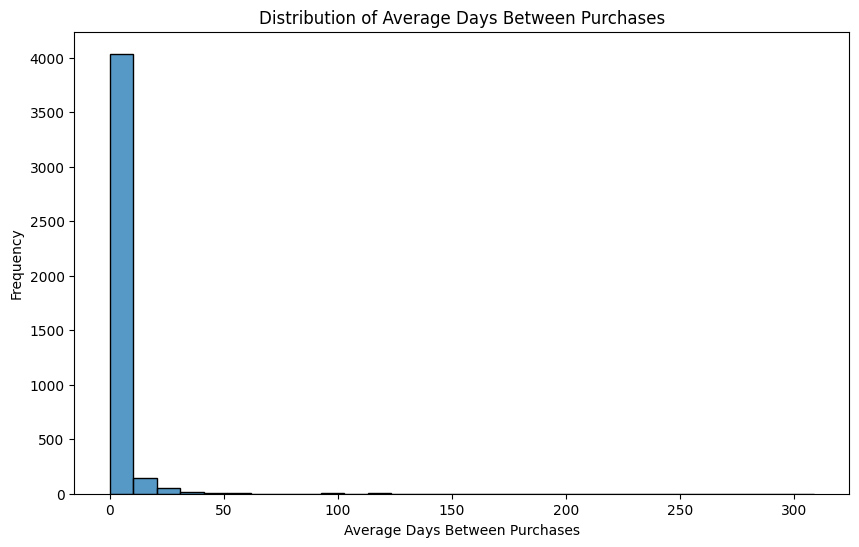

In [67]:
plt.figure(figsize=(10, 6))
sns.histplot(average_days_between_purchases,bins=30)
plt.title('Distribution of Average Days Between Purchases')
plt.xlabel('Average Days Between Purchases')
plt.ylabel('Frequency')
plt.show()

In [68]:
max(average_days_between_purchases)

309.0

In [69]:
average_days_between_purchases.describe()

,DaysBetweenPurchases
count,4292.000000
mean,3.364330
std,11.413559
min,0.000000
25%,0.000000
50%,1.139148
75%,3.030791
max,309.000000


In [70]:
average_days_between_purchases > 10

,DaysBetweenPurchases
CustomerID,
12347,False
12348,False
12349,False
12350,False
12352,False
...,...
18280,False
18281,False
18282,False


In [71]:
new_data = average_days_between_purchases[average_days_between_purchases < 10]
new_data

,DaysBetweenPurchases
CustomerID,
12347,2.000000
12348,9.400000
12349,0.000000
12350,0.000000
12352,2.744681
...,...
18280,0.000000
18281,0.000000
18282,9.833333


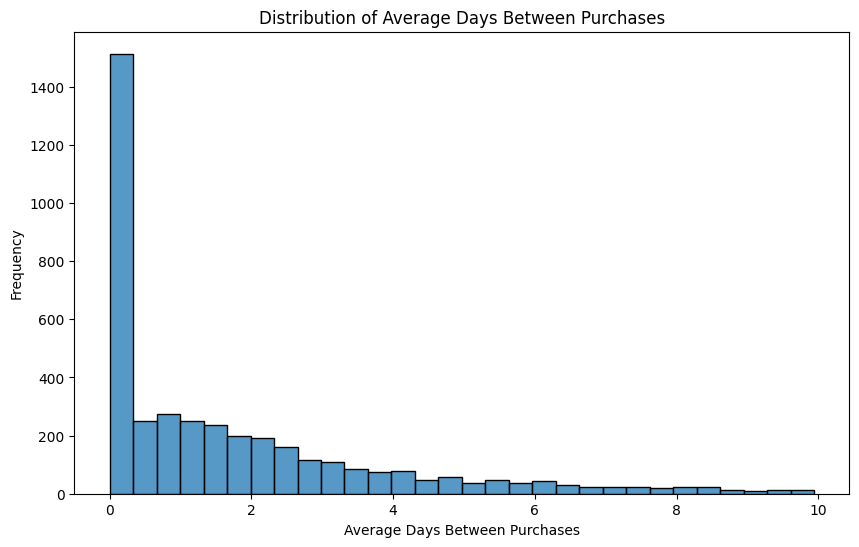

In [72]:
plt.figure(figsize=(10, 6))
sns.histplot(new_data,bins=30)
plt.title('Distribution of Average Days Between Purchases')
plt.xlabel('Average Days Between Purchases')
plt.ylabel('Frequency')
plt.show()

### RFM

In [73]:
crm_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 410105 entries, 0 to 541908
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    410105 non-null  object        
 1   StockCode    410105 non-null  object        
 2   Description  410105 non-null  object        
 3   Quantity     410105 non-null  int64         
 4   InvoiceDate  410105 non-null  datetime64[ns]
 5   UnitPrice    410105 non-null  float64       
 6   CustomerID   410105 non-null  int64         
 7   Country      410105 non-null  object        
 8   AmountSpent  410105 non-null  float64       
 9   Month        410105 non-null  int32         
 10  Day          410105 non-null  int32         
 11  Hour         410105 non-null  int32         
 12  Year         410105 non-null  int32         
 13  YearMonth    410105 non-null  int64         
 14  Week         410105 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32

In [74]:
crm_data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,AmountSpent,Month,Day,Hour,Year,YearMonth
count,410105.000000,410105,410105.000000,410105.000000,410105.000000,410105.000000,410105.000000,410105.000000,410105.000000,410105.000000
mean,11.962729,2011-07-10 14:07:28.379025152,3.696400,15285.699106,20.398611,7.601085,3.599198,12.738574,2010.934197,201101.020819
min,-9360.000000,2010-12-01 08:26:00,0.000000,12347.000000,-38970.000000,1.000000,1.000000,6.000000,2010.000000,201012.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13940.000000,4.200000,5.000000,2.000000,11.000000,2011.000000,201104.000000
50%,5.000000,2011-07-29 15:02:00,1.950000,15150.000000,11.250000,8.000000,3.000000,13.000000,2011.000000,201107.000000
75%,12.000000,2011-10-20 12:41:00,3.750000,16794.000000,19.500000,11.000000,5.000000,14.000000,2011.000000,201110.000000
max,12540.000000,2011-12-09 12:50:00,38970.000000,18287.000000,38970.000000,12.000000,7.000000,20.000000,2011.000000,201112.000000
std,50.716759,NaN,78.062737,1713.414264,123.521275,3.416344,1.907950,2.302394,0.247937,23.843393


In [75]:
#Remove Retirned orders
nonReturnedDf = crm_data[~crm_data["InvoiceNo"].str.contains("C", na = False)]
nonReturnedDf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401209 entries, 0 to 541908
Data columns (total 15 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401209 non-null  object        
 1   StockCode    401209 non-null  object        
 2   Description  401209 non-null  object        
 3   Quantity     401209 non-null  int64         
 4   InvoiceDate  401209 non-null  datetime64[ns]
 5   UnitPrice    401209 non-null  float64       
 6   CustomerID   401209 non-null  int64         
 7   Country      401209 non-null  object        
 8   AmountSpent  401209 non-null  float64       
 9   Month        401209 non-null  int32         
 10  Day          401209 non-null  int32         
 11  Hour         401209 non-null  int32         
 12  Year         401209 non-null  int32         
 13  YearMonth    401209 non-null  int64         
 14  Week         401209 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32

In [76]:
nonReturnedDf["InvoiceDate"].max()

Timestamp('2011-12-09 12:50:00')

In [77]:
today_date = dt.datetime(2011,12,11)
today_date

datetime.datetime(2011, 12, 11, 0, 0)

In [78]:
#RFM Dataframe
rfm_df = nonReturnedDf.groupby("CustomerID").agg({"InvoiceDate" : lambda InvoiceDate: (today_date - InvoiceDate.max()).days, # Recency
                                "InvoiceNo" : lambda InvoiceNo : InvoiceNo.nunique(), # Frequency
                                "AmountSpent" : lambda AmountSpent: AmountSpent.sum()}) # Monetary

In [79]:
rfm_df.head()

,InvoiceDate,InvoiceNo,AmountSpent
CustomerID,,,
12347,3,7,4310.00
12348,76,4,1797.24
12349,19,1,1757.55
12350,311,1,334.40
12352,37,8,2506.04


In [80]:
rfm_df.columns = ["Recency", "Frequency", "Monetary"]
rfm_df

,Recency,Frequency,Monetary
CustomerID,,,
12347,3,7,4310.00
12348,76,4,1797.24
12349,19,1,1757.55
12350,311,1,334.40
12352,37,8,2506.04
...,...,...,...
18280,278,1,180.60
18281,181,1,80.82
18282,8,2,178.05


In [81]:
rfm_df.sort_values(by = "Monetary", ascending = False).head()

,Recency,Frequency,Monetary
CustomerID,,,
14646,2,74,280206.02
18102,1,61,263461.26
17450,9,46,194390.79
14911,2,201,143711.17
12415,25,21,124914.53


In [82]:
# Create the recency_score, frequency_score, and monetary_score values.
rfm_df["Recency_Score"] = pd.qcut(rfm_df["Recency"], 5, labels = [5, 4, 3, 2, 1])
rfm_df["Frequency_Score"] = pd.qcut(rfm_df["Frequency"].rank(method = "first"), 5, labels = [1, 2, 3, 4, 5])
rfm_df["Monetary_Score"] = pd.qcut(rfm_df["Monetary"], 5, labels = [1, 2, 3, 4, 5])

In [83]:
rfm_df.head(20)

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score
CustomerID,,,,,,
12347,3,7,4310.00,5,5,5
12348,76,4,1797.24,2,4,4
12349,19,1,1757.55,4,1,4
12350,311,1,334.40,1,1,2
12352,37,8,2506.04,3,5,5
12353,205,1,89.00,1,1,1
12354,233,1,1079.40,1,1,4
12355,215,1,459.40,1,1,2
12356,23,3,2811.43,4,3,5


In [84]:
rfm_df["RF_Score"] = rfm_df["Recency_Score"].astype(str) + rfm_df["Frequency_Score"].astype(str)

In [85]:
rfm_df.head()

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RF_Score
CustomerID,,,,,,,
12347,3,7,4310.00,5,5,5,55
12348,76,4,1797.24,2,4,4,24
12349,19,1,1757.55,4,1,4,41
12350,311,1,334.40,1,1,2,11
12352,37,8,2506.04,3,5,5,35


In [86]:
segmentationMap = {
    r'[1-2][1-2]' : 'hibernating',
    r'[1-2][3-4]' : 'at_Risk',
    r'[1-2]5' : 'cant-loose',
    r'3[1-2]' : 'about_to_sleep',
    r'33' : 'need_attention',
    r'[3-4][4-5]' : 'loyal_customers',
    r'41' : 'promising',
    r'51' : 'new_customers',
    r'[4-5][2-3]' : 'potential_loyalists',
    r'5[4-5]' : 'champions'}

    # Refrence https://clevertap.com/blog/rfm-analysis/


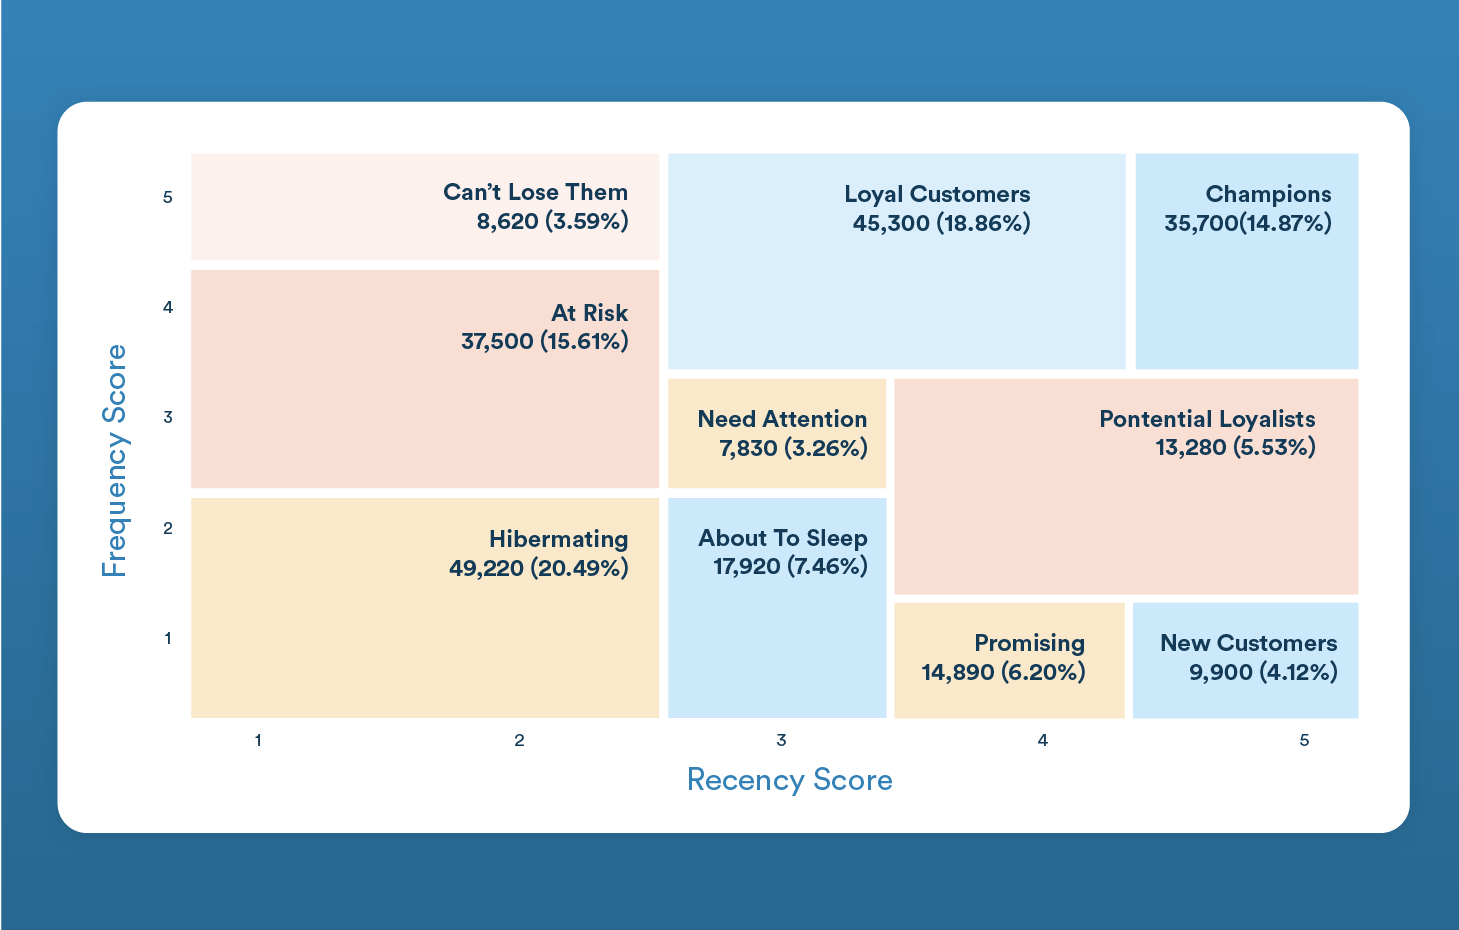

In [87]:
rfm_df["segment"] = rfm_df["RF_Score"].replace(segmentationMap, regex = True)

In [88]:
rfm_df.head()

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RF_Score,segment
CustomerID,,,,,,,,
12347,3,7,4310.00,5,5,5,55,champions
12348,76,4,1797.24,2,4,4,24,at_Risk
12349,19,1,1757.55,4,1,4,41,promising
12350,311,1,334.40,1,1,2,11,hibernating
12352,37,8,2506.04,3,5,5,35,loyal_customers


In [89]:
rfm_df[["segment", "Recency", "Frequency", "Monetary"]].groupby("segment").agg(["mean", "sum", "count"])

Recency                Frequency              \
                           mean     sum count       mean   sum count   
segment                                                                
about_to_sleep        53.563739   18908   353   1.172805   414   353   
at_Risk              153.765000   92259   600   2.928333  1757   600   
cant-loose           132.606557    8089    61   8.573770   523    61   
champions              6.382677    4053   635  12.626772  8018   635   
hibernating          217.762664  232135  1066   1.108818  1182  1066   
loyal_customers       33.595823   27347   814   6.646192  5410   814   
need_attention        51.633508    9862   191   2.376963   454   191   
new_customers          7.681818     338    44   1.000000    44    44   
potential_loyalists   17.364017    8300   478   2.041841   976   478   
promising             23.437500    2250    96   1.000000    96    96   

                        Monetary                     
                            mean          sum count  
segment                                              
about_to_sleep        472.817025   166904.410   353  
at_Risk              1107.071552   664242.931   600  
cant-loose           2814.414426   171679.280    61  
champions            6896.020850  4378973.240   635  
hibernating           414.357760   441705.372  1066  
loyal_customers      2937.320124  2390978.581   814  
need_attention        910.972461   173995.740   191  
new_customers         388.063182    17074.780    44  
potential_loyalists   729.382720   348644.940   478  
promising             288.103854    27657.970    96

In [90]:
rfm_df["segment"].value_counts()

,count
segment,
hibernating,1066
loyal_customers,814
champions,635
at_Risk,600
potential_loyalists,478
about_to_sleep,353
need_attention,191
promising,96
cant-loose,61


<Axes: xlabel='count', ylabel='segment'>

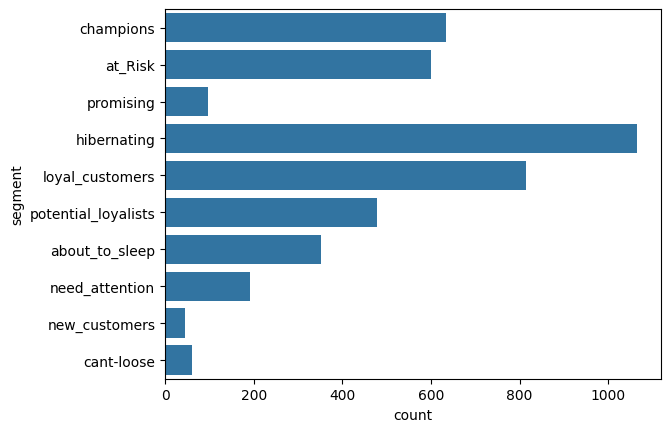

In [91]:
sns.countplot(y ='segment', data = rfm_df)

Hibernating: Customers who used to purchase frequently but haven't in a while. They are inactive.

At Risk: Customers who are at the risk of becoming inactive. They used to purchase, but the frequency has decreased.

Can't Loose: Customers who have made only one or two purchases and are unlikely to return.

About to Sleep: Customers who used to purchase but haven't in a while and are likely to become inactive.

Need Attention: Customers who are not frequent buyers and need attention to keep them engaged.

Loyal Customers: Customers who are consistently making purchases and are loyal to the company.

Promising: Customers who have made a few purchases and show potential for becoming loyal.

New Customers: Recently acquired customers who are in the early stages of their relationship with the company.

Potential Loyalists: Customers who have made purchases in the past and show potential for becoming loyal.

Champions: Highly valuable customers who make frequent purchases and are loyal to the company.



In [92]:
rfm_df.head()

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RF_Score,segment
CustomerID,,,,,,,,
12347,3,7,4310.00,5,5,5,55,champions
12348,76,4,1797.24,2,4,4,24,at_Risk
12349,19,1,1757.55,4,1,4,41,promising
12350,311,1,334.40,1,1,2,11,hibernating
12352,37,8,2506.04,3,5,5,35,loyal_customers


In [93]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4338 entries, 12347 to 18287
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Recency          4338 non-null   int64   
 1   Frequency        4338 non-null   int64   
 2   Monetary         4338 non-null   float64 
 3   Recency_Score    4338 non-null   category
 4   Frequency_Score  4338 non-null   category
 5   Monetary_Score   4338 non-null   category
 6   RF_Score         4338 non-null   object  
 7   segment          4338 non-null   object  
dtypes: category(3), float64(1), int64(2), object(2)
memory usage: 216.7+ KB


Top five Recency

In [94]:
rfm_df.sort_values(by = "Recency", ascending = True).head()

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RF_Score,segment
CustomerID,,,,,,,,
15344,1,3,563.94,5,3,3,53,potential_loyalists
15804,1,14,6215.22,5,5,5,55,champions
12748,1,213,33101.19,5,5,5,55,champions
17490,1,9,2092.32,5,5,5,55,champions
16626,1,17,4413.10,5,5,5,55,champions


Bottom five Recency

In [95]:
rfm_df.sort_values(by = "Recency", ascending = False).head()

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RF_Score,segment
CustomerID,,,,,,,,
15922,374,1,369.50,1,2,2,12,hibernating
17908,374,1,232.03,1,2,1,12,hibernating
14237,374,1,161.00,1,1,1,11,hibernating
17968,374,1,265.10,1,2,2,12,hibernating
15165,374,1,487.75,1,1,2,11,hibernating


Top Five Customers based on Frequency

In [96]:
rfm_df.sort_values(by = "Frequency", ascending = False).head()

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RF_Score,segment
CustomerID,,,,,,,,
12748,1,213,33101.19,5,5,5,55,champions
14911,2,201,143711.17,5,5,5,55,champions
17841,2,124,40519.84,5,5,5,55,champions
13089,3,98,58790.09,5,5,5,55,champions
15311,1,96,62907.79,5,5,5,55,champions


Bottom Five Customers based on Frequency

In [97]:
rfm_df.sort_values(by = "Frequency", ascending = True).head()

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RF_Score,segment
CustomerID,,,,,,,,
15723,365,1,190.70,1,1,1,11,hibernating
15041,171,1,179.93,2,1,1,21,hibernating
13845,65,1,312.98,3,1,2,31,about_to_sleep
13844,12,1,361.62,5,1,2,51,new_customers
18006,24,1,444.68,4,2,2,42,potential_loyalists


In [98]:
rfm_df['segment'].unique()

array(['champions', 'at_Risk', 'promising', 'hibernating',
       'loyal_customers', 'potential_loyalists', 'about_to_sleep',
       'need_attention', 'new_customers', 'cant-loose'], dtype=object)

Top 5 based on Segment

In [99]:
rfm_df[rfm_df["segment"] == 'at_Risk'].sort_values(by = "segment", ascending = False).head()

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RF_Score,segment
CustomerID,,,,,,,,
12348,76,4,1797.24,2,4,4,24,at_Risk
16629,74,2,408.63,2,3,2,23,at_Risk
16644,178,2,833.78,2,3,3,23,at_Risk
16647,170,2,214.06,2,3,1,23,at_Risk
16654,142,4,601.27,2,4,3,24,at_Risk


In [100]:
rfm_df[rfm_df["segment"] == 'champions'].sort_values(by = "segment", ascending = False).head()

,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RF_Score,segment
CustomerID,,,,,,,,
12347,3,7,4310.00,5,5,5,55,champions
16458,3,18,3482.74,5,5,5,55,champions
16393,3,13,3040.96,5,5,5,55,champions
16401,2,12,4098.32,5,5,5,55,champions
16407,13,10,2079.68,5,5,4,55,champions


In [108]:
!jupyter nbconvert --to pdf --output CRM_Data_Analysis_Krishna.pdf /content/drive/MyDrive/Colab\ Notebooks/CRM_Data_Analysis_Krishna.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/CRM_Data_Analysis_Krishna.ipynb to pdf
[NbConvertApp] Support files will be in CRM_Data_Analysis_Krishna_files/
[NbConvertApp] Making directory ./CRM_Data_Analysis_Krishna_files
[NbConvertApp] Making directory ./CRM_Data_Analysis_Krishna_files
[NbConvertApp] Making directory ./CRM_Data_Analysis_Krishna_files
[NbConvertApp] Making directory ./CRM_Data_Analysis_Krishna_files
[NbConvertApp] Making directory ./CRM_Data_Analysis_Krishna_files
[NbConvertApp] Making directory ./CRM_Data_Analysis_Krishna_files
[NbConvertApp] Making directory ./CRM_Data_Analysis_Krishna_files
[NbConvertApp] Making directory ./CRM_Data_Analysis_Krishna_files
[NbConvertApp] Making directory ./CRM_Data_Analysis_Krishna_files
[NbConvertApp] Making directory ./CRM_Data_Analysis_Krishna_files
[NbConvertApp] Making directory ./CRM_Data_Analysis_Krishna_files
[NbConvertApp] Writing 163417 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConve